In [1]:
using QuantumOptics
import PhysicalConstants.CODATA2018: c_0, ħ
using Unitful
using PyPlot
using LinearAlgebra

### Parameters

In [25]:
# Nbr of particles
N = 2

# Physical constants
#ħ = 1.

# Normalisation parameters
λ = 421e-9
γ = 32.7e6 # In Hz

# Physical values
ω0 = (2π*ustrip(c_0)/λ)
ωl = ω0
kl = [ustrip(c_0)/ωl, 0, 0] # Laser along x
Ω = 1e7 # Taken from Barbut arXiv:2412.02541v1

# Position of atoms
a = 1e-6 # Distance between atoms
r0 = [[0, 0, 0], [a, 0, 0]]

# Normalization
ω0 = ω0 / γ
ωl = ωl / γ
kl = kl * λ
r0 = r0 / λ

# Integration parameter
tstep = 0.1
T = [0:tstep:10;]; # Normalised time

### Parametrisation

In [24]:
# Basis
b1 = SpinBasis(1//2)
bmb = tensor([b1 for i = 1:N]...)

# One body operators
σp = sigmap(b1)
σm = sigmam(b1)
#σz = sigmaz(b1)
nup = σp*σm
ndown = σm*σp

# Many body operators
Jz =sum([embed(bmb, i, -8*ndown) for i = 1:N]) + sum([embed(bmb, i, -9*nup) for i = 1:N]) # 2 level system but GS has mJ = -8, ES has mJ = -9
Nup = sum([embed(bmb, i, nup) for i = 1:N]);

### Hamiltonians

In [13]:
H0 = -Ω/2 * (sum([exp(1im*r0[i]'kl)*embed(bmb, i, σp) + exp(-1im*r0[i]'kl)embed(bmb, i, σm) for i = 1:N])) + 1*ω0/2*Jz # ustrip(ħ)
H0.data

4×4 SparseArrays.SparseMatrixCSC{ComplexF64, Int64} with 12 stored entries:
 -1.23144e9+0.0im             -5.0e6+0.0im         …             ⋅    
     -5.0e6+0.0im         -1.16303e9+0.0im                -5.0e6-3.35021e-7im
     -5.0e6+3.35021e-7im             ⋅                    -5.0e6+0.0im
            ⋅                 -5.0e6+3.35021e-7im     -1.09461e9+0.0im

In [14]:
J = [embed(bmb, i, σm) for i = 1:N];

# Spontaneous emission no $H$

In [26]:
# Initial state
Ψ0_mb = tensor([spinup(b1) for i = 1:N]...)
Γ = Matrix(I, N, N) # Normalized Γ

# Time evolution
ρt_se = timeevolution.master(T, Ψ0_mb, sparse(one(bmb)), J; rates=Γ, dt=tstep)[2];

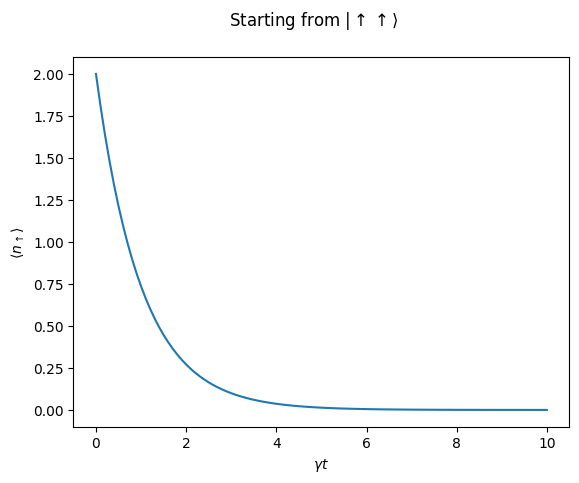

In [27]:
figure()
plot(T, real(expect(Nup, ρt_se)))
xlabel(L"$\gamma t$")
ylabel(L"$\langle  n_{\uparrow} \rangle $")
suptitle(L"Starting from $|\uparrow \uparrow \rangle $")
pygui(false); gcf()
#pygui(true); show()

# Without interactions

In [ ]:
# Initial state
Ψ0_mb = tensor([spindown(b1) for i = 1:N]...)

# Time evolution
Γ = 1. * Matrix(I, N, N) # Normalized Γ
ρt_se = timeevolution.master(T, Ψ0_mb, H0, J; rates=Γ, dt=tstep)[2];

MethodError: MethodError: no method matching (Matrix)(::UniformScaling{Bool}, ::Int64, ::Int64, ::Type{DataType})
The type `Matrix` exists, but no method is defined for this combination of argument types when trying to construct it.

Closest candidates are:
  (Matrix)(::UniformScaling, ::Integer, ::Integer)
   @ LinearAlgebra C:\Users\Joschka\.julia\juliaup\julia-1.12.1+0.x64.w64.mingw32\share\julia\stdlib\v1.12\LinearAlgebra\src\uniformscaling.jl:432
  (Matrix)(!Matched::UndefInitializer, ::Integer, ::Integer)
   @ Base baseext.jl:33
  (Matrix)(!Matched::ArnoldiMethod.Rotation2{Tc, Ts}, ::Int64) where {Tc, Ts}
   @ ArnoldiMethod C:\Users\Joschka\.julia\packages\ArnoldiMethod\jWXk3\src\schurfact.jl:38
  ...


In [22]:
T

101-element Vector{Float64}:
  0.0
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9
  ⋮
  9.2
  9.3
  9.4
  9.5
  9.6
  9.7
  9.8
  9.9
 10.0

# Brouillons

In [11]:
# deg = 1
# E0 = 1
# Ω = deg*E0/ustrip(ħ) 
# H0 = -Ω/2 * (sum([exp(1im*r0[i]'kl)*embed(bmb, i, σp) + exp(-1im*r0[i]'kl)embed(bmb, i, σm) for i = 1:N])) + ustrip(ħ)*ω0/2*Jz
